### Does the use of fertilizer and irrigation have a significant impact on reducing the days to harvest?

 - This question involves analyzing the impact of the boolean columns `Fertilizer_Used` and `Irrigation_Used` on `Days_to_Harvest`. It allows you to demonstrate proficiency in filtering data and performing comparison analysis using boolean conditions.

Data source: https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield
 

In [5]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as st 
LabelEncoder = preprocessing.LabelEncoder()

In [ ]:
# Create dataframe
df = pd.read_csv('../data/crop_yield.csv')

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


Fertilizer Statistic: -0.0010288285123319192; Fertilizer P_Value: 0.3035607423984428
Irrigation Statistic: -0.0012342537783770972; Irrigation P_Value: 0.21710875323412918
Fertilizer Statistic: -0.0010275773068250263; Fertilizer P_Value: 0.30414918029658417
Irrigation Statistic: -0.0012339080740407825; Irrigation P_Value: 0.21723756032818153
Max: Irrigation with -0.0010288285123319192
Count of 
    Fertilizer values: 1000000
    Irrigation values: 1000000
    Days to Harvest values: 1000000
Average days to harvest: 104.495025


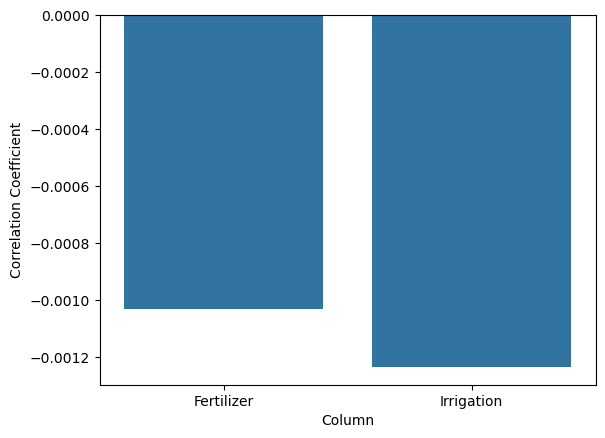

In [39]:

df['Fertilizer_Used_Ind'] = np.where(df['Fertilizer_Used'] == True, 1, 0)
df['Irrigation_Used_Ind'] = np.where(df['Fertilizer_Used'] == True, 1, 0)

fe_stat, fe_p_value = st.pearsonr(df['Fertilizer_Used'], df['Days_to_Harvest'])

ir_stat, ir_p_value = st.pearsonr(df['Irrigation_Used'], df['Days_to_Harvest'])

print(f'Fertilizer Statistic: {fe_stat}; Fertilizer P_Value: {fe_p_value}')
print(f'Irrigation Statistic: {ir_stat}; Irrigation P_Value: {ir_p_value}')

# spearmanr

fe_s_stat, fe_s_p_value = st.spearmanr(df['Fertilizer_Used'], df['Days_to_Harvest'])

ir_s_stat, ir_s_p_value = st.spearmanr(df['Irrigation_Used'], df['Days_to_Harvest'])

print(f'Fertilizer Statistic: {fe_s_stat}; Fertilizer P_Value: {fe_s_p_value}')
print(f'Irrigation Statistic: {ir_s_stat}; Irrigation P_Value: {ir_s_p_value}')

# put it in a df: fertilizer with both pearson and spearman
df_fertilzer = pd.DataFrame({'Pearson': [fe_stat, fe_p_value],
                            'Spearman': [fe_s_stat, fe_s_p_value]})
# df: irrigation with both pearson and spearman
df_irrigation = pd.DataFrame({'Pearson': [ir_stat, ir_p_value],
                            'Spearman': [ir_s_stat, ir_s_p_value]})
# df: fertilizer and irrigation pearson
df_fert_irr = pd.DataFrame({'Column': ['Fertilizer', 'Irrigation'],
                            'Correlation Coefficient': [fe_stat, ir_stat]})
                            #'Irrigation': [ir_stat]})


# plot it: fertilizer with both pearson and spearman
#sns.lineplot(data=df_fertilzer)
# plot: irrigation with both pearson and spearman

# PLOT: compare correlation coefficient between fertilizer and irrigation
sns.barplot(data=df_fert_irr, x='Column', y='Correlation Coefficient')
plt.xlabel("Column")

# summary statistics
print(f'Max: {df_fert_irr['Column'].max()} with {df_fert_irr['Correlation Coefficient'].max()}')
# count of all fertilizer, irrigation, and days_to_harvest
print(f'''Count of 
    Fertilizer values: {df['Fertilizer_Used_Ind'].count()}
    Irrigation values: {df['Irrigation_Used_Ind'].count()}
    Days to Harvest values: {df['Days_to_Harvest'].count()}''')
# average days to harvest
print(f'Average days to harvest: {df['Days_to_Harvest'].mean()}')